# Bank Marketting Campaign Predictive Analysis

### Problem Statement
* From May 2008 to November 2010, A portuguese Banking Institution ran a direct marketting campaign wherein they call the client to see if they had like to open a Term Deposit with them or not. 
* Out task is - Given the details of a client, predict whether he will like to open a Term Deposit or Not. 
* Predicting this, the Bank can better target the customers with higher likelyhood of opening the term deposit and can reduce on unnecessary spending on customers with less likelihood. 
* Further, The bank can better plan with the loan remit amount and its risk taking capability.

### Dataset -
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
  
  Dataset URL - https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [3]:
# Data Analysis and wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier


#### Load Data

In [4]:
rawdata = pd.read_csv('bank-full-formatted.csv')

In [5]:
# Data Rows and Columns Analysis
print('Rows,Column = ' , rawdata.shape)

Rows,Column =  (45211, 17)


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Observation -
* 45211 rows and 17 columns. 
* 9 Input Categorical Features -
    * Job 
    * Marital
    * Education
    * Default
    * Housing
    * Loan
    * Contact
    * Month
    * POutcome
* 7 Input Numerical Features -
    * Age
    * Balance
    * Day
    * Duration
    * Campaign - Average no. of contacts performed during the current campaign for a client
    * PDays - Average no. of days passed after the client was contacted from previous campaign .
    * Previous - Average no. of contacts performed before this campaign for a client
* 1 Output Categirical Feature -
    * y - Whether the client will subscribe to Term Deposit Or Not.
* There are no null values. 

#### Sneak Peak at Dataset

In [5]:
rawdata.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Distribution of Numerical Features

In [6]:
rawdata.describe(percentiles = [.25,.50,.75,.90,.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Observation -
* Majority of people were either contacted fpr the first time (>=75%) or were contacted again after significant number of days. 
etc...

#### Distribution of Categorical Features -

In [7]:
rawdata.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#### Observation -
* 12 Unique Jobs with Blue-Collar representing 21.5%.
* 60% married people. rest 40% include Single and Divorced. 
* 51% people having secondary education. 
* 98% people with no default. 
* 84% people with no loan. 
* 65% people contacted on cellular phone. 
* May having 30% data. 
* poutput unknown for 81% data. 
* 88% didn't subscribe to term deposit. 

#### Takeaway for Univariate Visualization -
* Since Jobs and Month have high number of distinct values(12), therefore plot a bar graph. 
* For remaining categorical features, simple tables would work

#### Data Wrangling

In [6]:
# Create a dummy column with value  = 1 for term deposit subscribers else 0. 
def fun1(data):
    if data == 'yes':
        return 1
    else:
        return 0

rawdata['y_num'] = rawdata['y'].apply(fun1)

### Analyze by Pivoting Features

##### Univeriate Analysis on Categorical Features

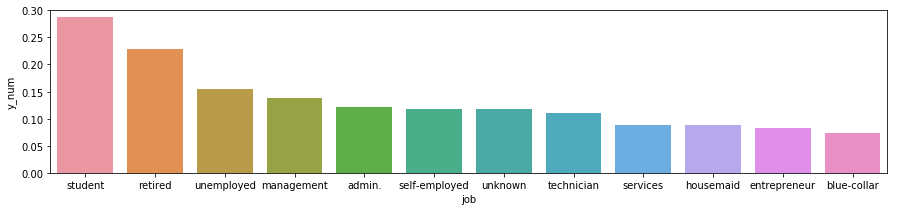

In [18]:
fig = plt.figure(figsize = (15,3))
job_pivot = rawdata[['job', 'y_num']].groupby(['job'], as_index=False).mean().sort_values(by='y_num', ascending=False)
sns.barplot(x = 'job', y = 'y_num', data = job_pivot)
plt.show()

In [33]:
rawdata[['marital', 'y_num']].groupby(['marital'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,marital,y_num
2,single,0.149492
0,divorced,0.119455
1,married,0.101235


In [35]:
rawdata[['education', 'y_num']].groupby(['education'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,education,y_num
2,tertiary,0.150064
3,unknown,0.135703
1,secondary,0.105594
0,primary,0.086265


In [42]:
rawdata[['default', 'y_num']].groupby(['default'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,default,y_num
0,no,0.117961
1,yes,0.063804


In [36]:
rawdata[['housing', 'y_num']].groupby(['housing'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,housing,y_num
0,no,0.167024
1,yes,0.077000


In [37]:
rawdata[['loan', 'y_num']].groupby(['loan'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,loan,y_num
0,no,0.126557
1,yes,0.066814


In [38]:
rawdata[['contact', 'y_num']].groupby(['contact'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,contact,y_num
0,cellular,0.149189
1,telephone,0.134205
2,unknown,0.040707


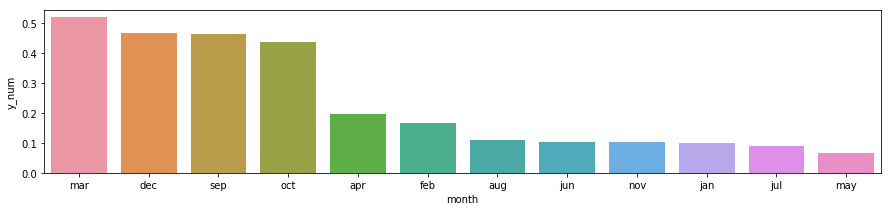

In [68]:
fig = plt.figure(figsize = (15,3))
month_pivot = rawdata[['month', 'y_num']].groupby(['month'], as_index=False).mean().sort_values(by='y_num', ascending=False)
sns.barplot(x = 'month', y = 'y_num', data = month_pivot)
plt.show()

In [40]:
rawdata[['poutcome', 'y_num']].groupby(['poutcome'], as_index=False).mean().sort_values(by='y_num', ascending=False)

,poutcome,y_num
2,success,0.647253
1,other,0.166848
0,failure,0.126097
3,unknown,0.091615


#### Observation -
* job - Students, Retired have higher TD(term deposit) rate. 
* marital - Singles have slightly higher chance.
* education - Less education = less TD. Possible reasons being no income to invest or lack of knowledge about term deposit. 
* default - People Not Defaultng open more term deposits. 
* housing - People with No Housing open more term deposit.
* loan - People with No Loan open more term deposit.
* contact - No clear correlation. Better to create a new feature like contact known or unknown.
* month - Year end or Financial year end result in more term deposit opening. 
* poutcome - Previous success result in more chances of current success. 

#### Univariate Analysis on Numerical Features

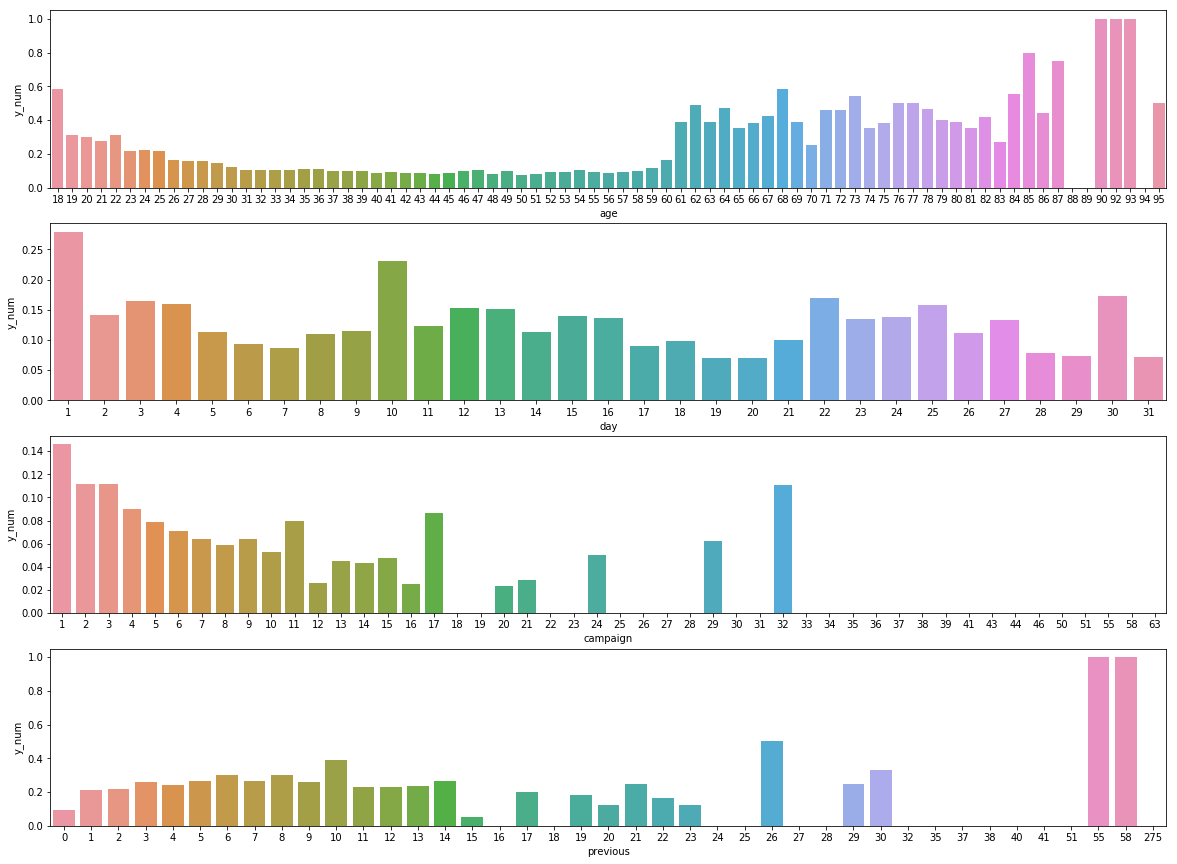

In [23]:
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

age_termdeposit_data = rawdata[['age', 'y_num']].groupby(['age'], as_index=False).mean().sort_values(by='y_num', ascending=False)
day_termdeposit_data = rawdata[['day', 'y_num']].groupby(['day'], as_index=False).mean().sort_values(by='y_num', ascending=False)
campaign_termdeposit_data = rawdata[['campaign', 'y_num']].groupby(['campaign'], as_index=False).mean().sort_values(by='y_num', ascending=False)
previous_termdeposit_data = rawdata[['previous', 'y_num']].groupby(['previous'], as_index=False).mean().sort_values(by='y_num', ascending=False)

sns.barplot(x = 'age', y='y_num', data = age_termdeposit_data, ax = ax1)
sns.barplot(x = 'day', y='y_num', data = day_termdeposit_data, ax = ax2)
sns.barplot(x = 'campaign', y='y_num', data = campaign_termdeposit_data, ax = ax3)
sns.barplot(x = 'previous', y='y_num', data = previous_termdeposit_data, ax = ax4)

plt.show()

#### Observation
* Younger and older people have higher chances of opening a term deposit. 
* Less chances of opening a term deposit in mid of the month. 

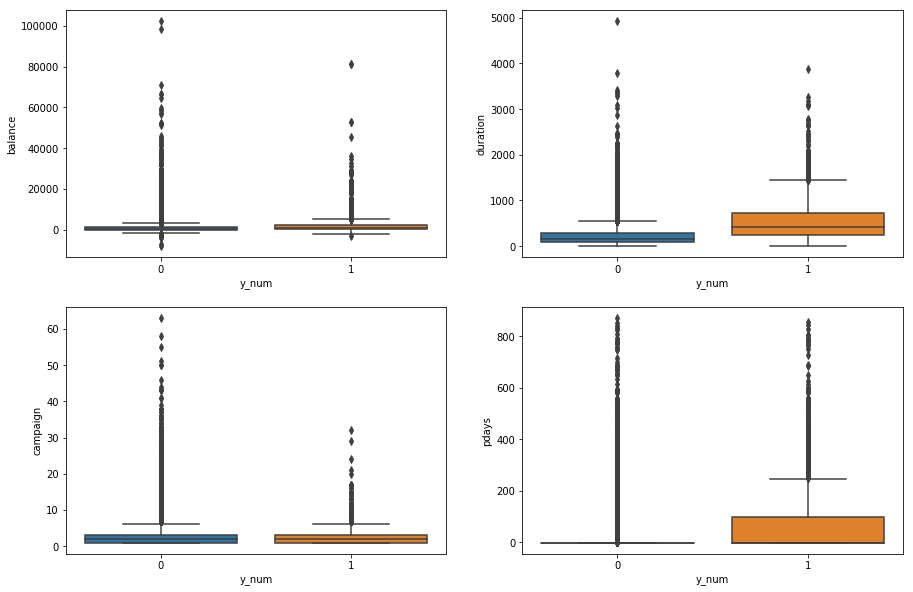

In [38]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.boxplot(x = rawdata['y_num'], y=rawdata['balance'], ax = ax1)
sns.boxplot(x = rawdata['y_num'], y=rawdata['duration'], ax = ax2)
sns.boxplot(x = rawdata['y_num'], y=rawdata['campaign'], ax = ax3)
sns.boxplot(x = rawdata['y_num'], y=rawdata['pdays'], ax = ax4)

plt.show()

#### Observation -
* age - Younger and Older age group tend to have higher success ratio. 
* balance - 
* day - higher rate at start of month. 
* duration - 
* campaign - Less Campaign = more success ratio
* pdays - 
* previous - higher success if previously contacted.

## Data Wrangling Action Plan -

 #### For Numerical Features -
 * Age -
     * Young - 18-
     

In [7]:
def age_new(data):
    if data >= 18 and data < 26:
        return 'young'
    elif data >=26 and data<31:
        return 'adult'
    elif data >=31 and data<61:
        return 'mid age'
    else:
        return 'old'

def balance_new(data):
    if data < 0:
        return 'negative'
    elif data >=0 and data <=100:
        return 'pos_low'
    elif data >100 and data <= 1500:
        return 'pos_mid'
    else:
        return 'pos_high'

def duration_new(data):
    if data <= 300:
        return '<5'
    elif data >300 and data <=600:
        return 'between 5 and 10'
    else:
        return 'more than 10'

def campaign_new(data):
    if data == 1:
        return '1'
    elif data >=2 and data<=3:
        return '2-3'
    else:
        return 'more than 3'

def pdays_new(data):
    if data == -1:
        return 'previously not contacted'
    elif data/30 >= 0 and data/30 <= 2:
        return 'contacted within 2 months'
    elif data/30 >2 and data/30 <= 6:
        return 'contacted after 2-6 months'
    else:
        return 'contacted after 6 months'

def previous_new(data):
    if data == 0:
        return 'never contacted'
    else:
        return 'contacted'
    
rawdata['NewAge'] = rawdata['age'].apply(age_new)
rawdata['Newbalance'] = rawdata['balance'].apply(balance_new)
rawdata['Newduration'] = rawdata['duration'].apply(duration_new)
rawdata['Newcampaign'] = rawdata['campaign'].apply(campaign_new)
rawdata['Newpdays'] = rawdata['pdays'].apply(pdays_new)
rawdata['Newprevious'] = rawdata['previous'].apply(previous_new)

In [8]:
rawdata.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,y_num,NewAge,Newbalance,Newduration,Newcampaign,Newpdays,Newprevious
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,0,mid age,pos_high,<5,1,previously not contacted,never contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,0,mid age,pos_low,<5,1,previously not contacted,never contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,0,mid age,pos_low,<5,1,previously not contacted,never contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,0,mid age,pos_high,<5,1,previously not contacted,never contacted
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,0,mid age,pos_low,<5,1,previously not contacted,never contacted


### Univariate EDA with new categorical variables

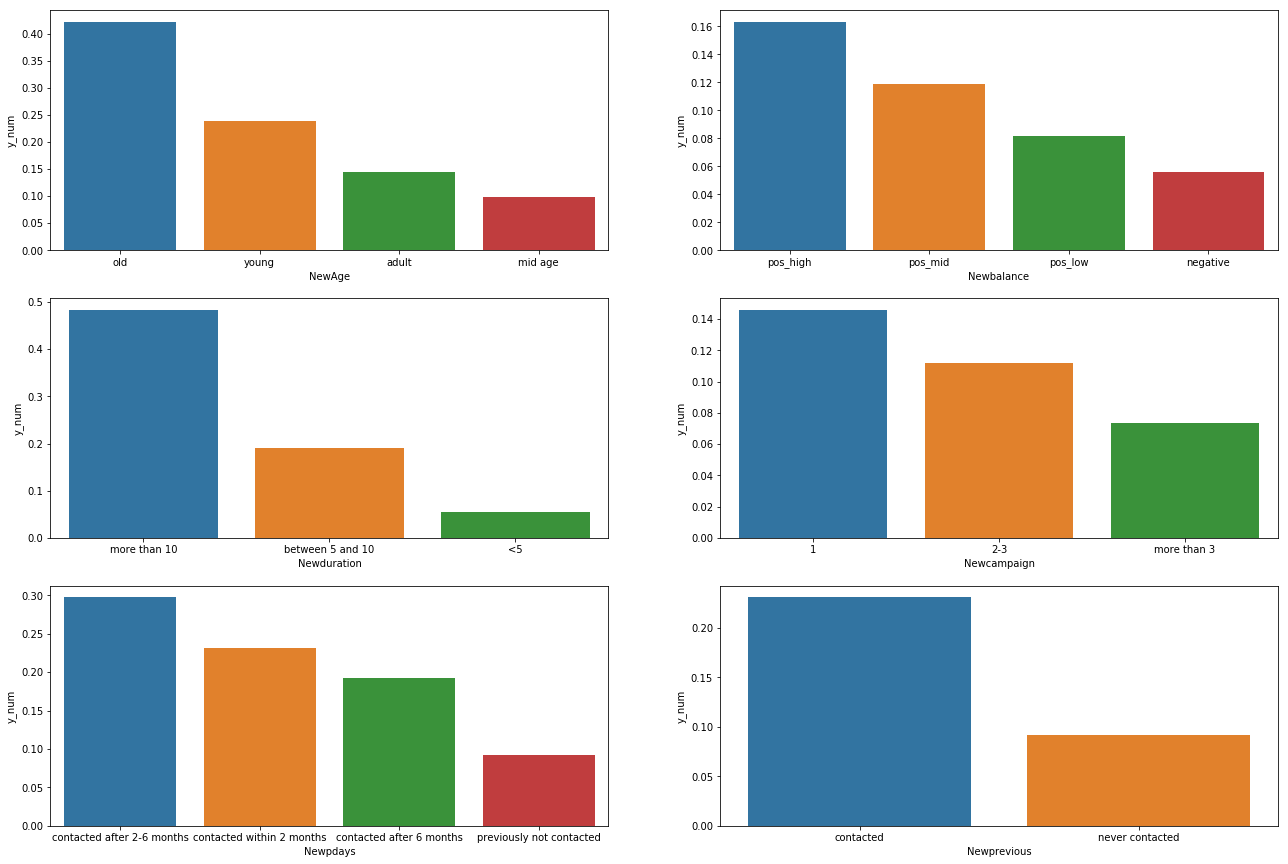

In [15]:
fig = plt.figure(figsize = (22,15))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

age_termdeposit_data = rawdata[['NewAge', 'y_num']].groupby(['NewAge'], as_index=False).mean().sort_values(by='y_num', ascending=False)
balance_termdeposit_data = rawdata[['Newbalance', 'y_num']].groupby(['Newbalance'], as_index=False).mean().sort_values(by='y_num', ascending=False)
duration_termdeposit_data = rawdata[['Newduration', 'y_num']].groupby(['Newduration'], as_index=False).mean().sort_values(by='y_num', ascending=False)
campaign_termdeposit_data = rawdata[['Newcampaign', 'y_num']].groupby(['Newcampaign'], as_index=False).mean().sort_values(by='y_num', ascending=False)
pdays_termdeposit_data = rawdata[['Newpdays', 'y_num']].groupby(['Newpdays'], as_index=False).mean().sort_values(by='y_num', ascending=False)
previous_termdeposit_data = rawdata[['Newprevious', 'y_num']].groupby(['Newprevious'], as_index=False).mean().sort_values(by='y_num', ascending=False)

sns.barplot(x = 'NewAge', y='y_num', data = age_termdeposit_data, ax = ax1)
sns.barplot(x = 'Newbalance', y='y_num', data = balance_termdeposit_data, ax = ax2)
sns.barplot(x = 'Newduration', y='y_num', data = duration_termdeposit_data, ax = ax3)
sns.barplot(x = 'Newcampaign', y='y_num', data = campaign_termdeposit_data, ax = ax4)
sns.barplot(x = 'Newpdays', y='y_num', data = pdays_termdeposit_data, ax = ax5)
sns.barplot(x = 'Newprevious', y='y_num', data = previous_termdeposit_data, ax = ax6)

plt.show()

#### Observation -
* Age - Old and Young people have hig chances of opening TD.
* Balance - chances of TD opening are more with people having higher balance. 
* Duration - Longer the duration, more the chances of conversion
* Campaign - more the campaign contact, less are teh chances of opening TD. 
* pdays - Customers should be contacted with 2-6 months to give them higher chances of opening TD. 
* Previous - People contacted previously have higher chances of opening a TD.

## Data Wrangling

In [29]:
rawdata['Newprevious'].unique()

array(['never contacted', 'contacted'], dtype=object)

In [8]:
marital_status_mapping = {'single' : 0, 'divorced' : 1, 'married':2}
job_status_mapping = {'student':0, 'retired':1, 'unemployed':2, 'management' : 3, 'admin.':4,
                      'self-employed':5, 'unknown':6, 'technician' : 7,  'services':8 ,'housemaid':9, 
                      'entrepreneur':10, 'blue-collar':11}
education_mapping = {'tertiary' : 0, 'unknown' : 1, 'secondary':2, 'primary':3}
default_mapping = {'no' : 0, 'yes' : 1}
housing_mapping = {'no' : 0, 'yes' : 1}
loan_mapping = {'no' : 0, 'yes' : 1}
contact_mapping = {'cellular' : 0, 'telephone' : 0, 'unknown':1}
poutcome_mapping = {'success' : 0, 'other' : 1, 'failure':2, 'unknown':3}
month_mapping = {'mar':0, 'dec':1, 'sep':2, 'oct' : 3, 'apr':4,
                      'feb':5, 'aug':6, 'jun' : 7,  'nov':8 ,'jan':9, 
                      'jul':10, 'may':11}

NewAge_mapping = {'old' : 0, 'young' : 1, 'adult':2, 'mid age':3}
Newbalance_mapping = {'pos_high' : 0, 'pos_mid' : 1, 'pos_low' : 2, 'negative':3}
Newduration_mapping = {'<5' : 0, 'between 5 and 10' : 1, 'more than 10':2}
Newcampaign_mapping = {'1' : 1, '2-3' : 2, 'more than 3':3}
Newpdays_mapping = {'contacted after 2-6 months' : 0, 'contacted within 2 months' : 1, 'contacted after 6 months' : 2, 'previously not contacted':3}
Newprevious_mapping = {'never contacted' : 0, 'contacted' : 1}

rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['job'] = rawdata['job'].map(job_status_mapping)
rawdata['month'] = rawdata['month'].map(month_mapping)
rawdata['education'] = rawdata['education'].map(education_mapping)
rawdata['default'] = rawdata['default'].map(default_mapping)
rawdata['housing'] = rawdata['housing'].map(housing_mapping)
rawdata['loan'] = rawdata['loan'].map(loan_mapping)
rawdata['contact'] = rawdata['contact'].map(contact_mapping)
rawdata['poutcome'] = rawdata['poutcome'].map(poutcome_mapping)

rawdata['NewAge'] = rawdata['NewAge'].map(NewAge_mapping)
rawdata['Newbalance'] = rawdata['Newbalance'].map(Newbalance_mapping)
rawdata['Newduration'] = rawdata['Newduration'].map(Newduration_mapping)
rawdata['Newcampaign'] = rawdata['Newcampaign'].map(Newcampaign_mapping)
rawdata['Newpdays'] = rawdata['Newpdays'].map(Newpdays_mapping)
rawdata['Newprevious'] = rawdata['Newprevious'].map(Newprevious_mapping)

In [8]:
rawdata.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,y_num,NewAge,Newbalance,Newduration,Newcampaign,Newpdays,Newprevious
0,58,3,2,0,0,2143,1,0,1,5,...,0,3,no,0,3,0,0,1,3,0
1,44,7,0,2,0,29,1,0,1,5,...,0,3,no,0,3,2,0,1,3,0
2,33,10,2,2,0,2,1,1,1,5,...,0,3,no,0,3,2,0,1,3,0
3,47,11,2,1,0,1506,1,0,1,5,...,0,3,no,0,3,0,0,1,3,0
4,33,6,0,1,0,1,0,0,1,5,...,0,3,no,0,3,2,0,1,3,0


In [9]:
rawdata.isnull().any().any()

False

In [65]:
rawdata['month'].unique()

array([11,  7, 10,  6,  3,  8,  1,  9,  5,  0,  4,  2], dtype=int64)

In [68]:
rawdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_num', 'NewAge', 'Newbalance',
       'Newduration', 'Newcampaign', 'Newpdays', 'Newprevious'],
      dtype='object')

In [9]:
final_dataset = rawdata[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 
        'poutcome', 'NewAge', 'Newbalance', 'Newduration', 'Newcampaign', 'Newpdays', 'Newprevious', 'y_num']]

In [71]:
final_dataset.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,NewAge,Newbalance,Newduration,Newcampaign,Newpdays,Newprevious,y_num
0,3,2,0,0,1,0,1,5,11,3,3,0,0,1,3,0,0
1,7,0,2,0,1,0,1,5,11,3,3,2,0,1,3,0,0
2,10,2,2,0,1,1,1,5,11,3,3,2,0,1,3,0,0
3,11,2,1,0,1,0,1,5,11,3,3,0,0,1,3,0,0
4,6,0,1,0,0,0,1,5,11,3,3,2,0,1,3,0,0


In [72]:
final_dataset.describe()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,NewAge,Newbalance,Newduration,Newcampaign,Newpdays,Newprevious,y_num
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000
mean,6.260512,1.319037,1.522063,0.018027,0.555838,0.160226,0.287983,15.806419,8.143837,2.709938,2.736126,1.118246,0.355312,1.825197,2.68240,0.182633,0.116985
std,3.384906,0.884908,1.068177,0.133049,0.496878,0.366820,0.452828,8.322476,2.715320,0.698469,0.641104,0.867663,0.629867,0.755479,0.78431,0.386369,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,3.000000,3.000000,1.000000,0.000000,1.000000,3.00000,0.000000,0.000000
50%,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,16.000000,8.000000,3.000000,3.000000,1.000000,0.000000,2.000000,3.00000,0.000000,0.000000
75%,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,21.000000,11.000000,3.000000,3.000000,2.000000,1.000000,2.000000,3.00000,0.000000,0.000000
max,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,31.000000,11.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.00000,1.000000,1.000000


In [74]:
final_dataset.shape

(45211, 17)

In [17]:
final_dataset_input = final_dataset.drop(['y_num'], axis=1)
final_dataset_output = final_dataset['y_num']

In [18]:
print(final_dataset_input.shape)
print(final_dataset_output.shape)

(45211, 16)
(45211,)


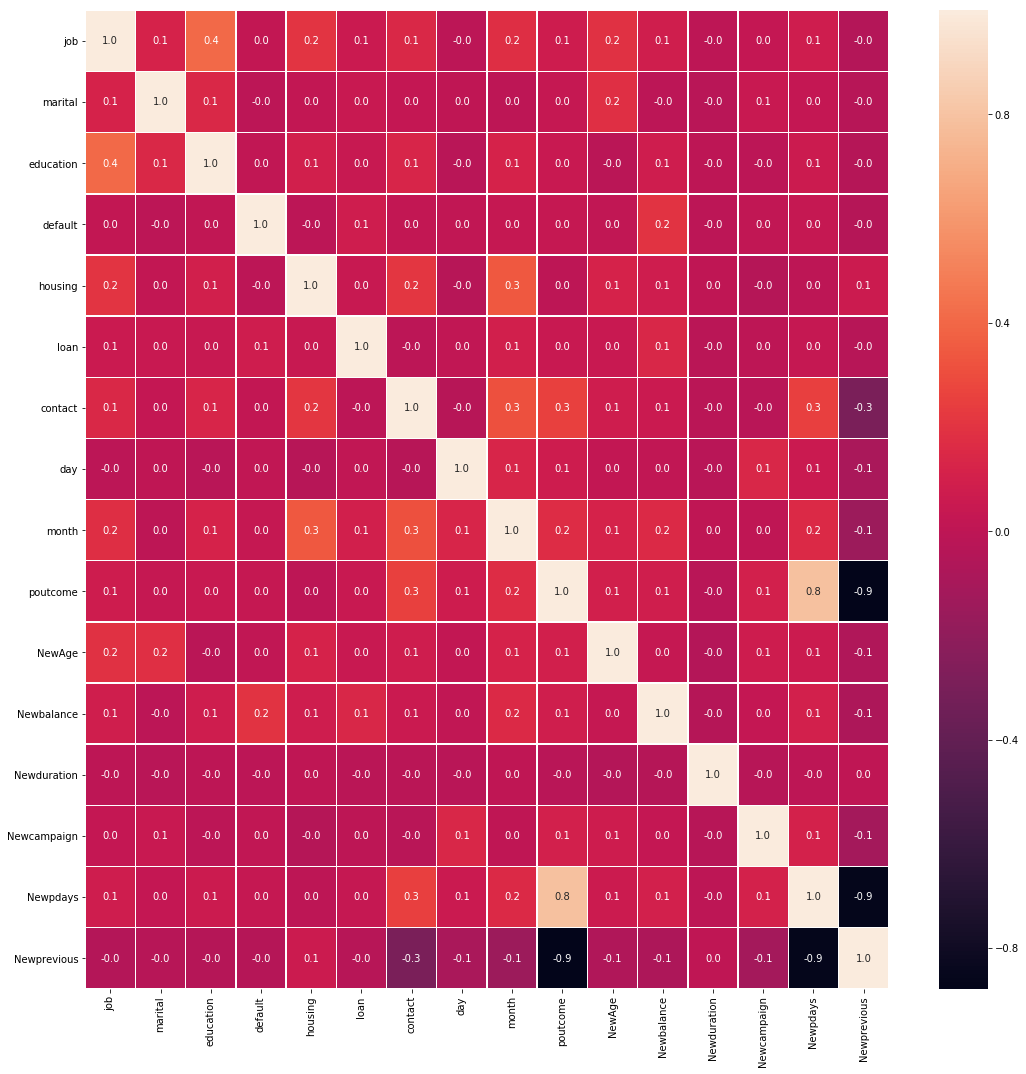

In [54]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(final_dataset_input.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [15]:
# Standardized data
stan_final_dataset_input = final_dataset.drop(['y_num', 'day'], axis=1)

scalar = StandardScaler()
stan_final_dataset_input = scalar.fit_transform(stan_final_dataset_input)

In [34]:
# Normalize
norm_final_dataset_input = final_dataset.drop(['y_num'], axis=1)

norm_final_dataset_input = normalize(norm_final_dataset_input)

#### Train Test Split

In [12]:
from sklearn import model_selection

In [19]:
X_1, X_test, y_1, y_test = model_selection.train_test_split(stan_final_dataset_input, final_dataset_output, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)


In [20]:
%%time

print(X_tr.shape)
print(y_tr.shape)
print(X_cv.shape)
print(y_cv.shape)

(22152, 15)
(22152,)
(9495, 15)
(9495,)
Wall time: 0 ns


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import confusion_matrix

## KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn.fit(X_tr, y_tr)

# predict the response on the crossvalidation train
pred = knn.predict(X_cv)

# evaluate CV accuracy
confusion_matrix(y_cv, pred)

array([[7944,  426],
       [ 717,  408]], dtype=int64)

In [24]:
from sklearn.metrics import f1_score

In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [28]:
%%time

list1 = []
k_list = []
pre_list = []
rec_list = []
f1_list = []
acc_list = []
auc_list = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    
    prefor = precision_score(y_cv, pred)
    recfor = recall_score(y_cv, pred)
    
    # evaluate CV accuracy
    f1_score_val = f1_score(y_cv, pred) 
    
    list1.append((i,prefor,recfor,f1_score_val))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, pred)
    
    
    k_list.append(i)
    pre_list.append(prefor)
    rec_list.append(recfor)
    f1_list.append(f1_score_val)
    acc_list.append(acc)
    auc_list.append(metrics.auc(fpr, tpr))
    
#    print('\n for k = %d, precision = %f ; recall = %f ; F1 Score = %f'  % (i,prefor,recfor,f1_score_val))

Wall time: 48.7 s


In [29]:
df11 = pd.DataFrame({'precision': pre_list,'recall': rec_list, 'f1_score' : f1_list, 'k' : k_list, 'accuracy' : acc_list, 'auc' : auc_list})

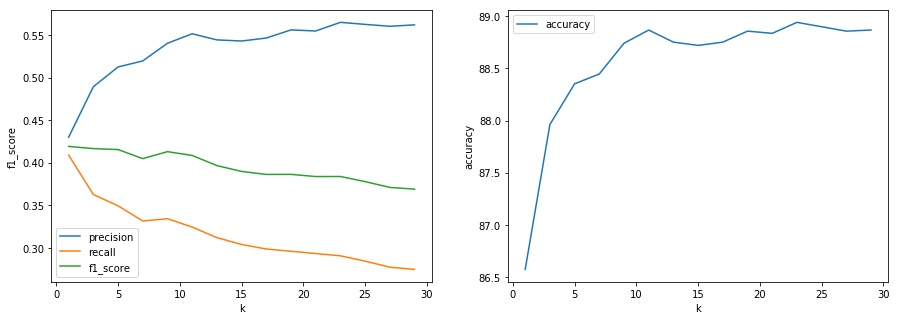

In [30]:
fig  = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.lineplot(x = 'k', y='precision', data = df11, label = 'precision', ax = ax1)
sns.lineplot(x = 'k', y='recall', data = df11, label = 'recall',  ax = ax1)
sns.lineplot(x = 'k', y='f1_score', data = df11, label = 'f1_score',ax = ax1)
sns.lineplot(x = 'k', y='accuracy', data = df11, label = 'accuracy', ax = ax2)

plt.show()

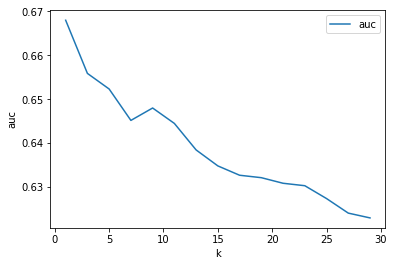

In [31]:
sns.lineplot(x = 'k', y='auc', data = df11, label = 'auc')

### Observation - 
For k=3, we get highest value of F1 Score. Therefore, using K = 3 to evaluate test data. 

In [32]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# fitting the model on crossvalidation train
knn.fit(X_1, y_1)

# predict the response on the crossvalidation train
pred = knn.predict(X_test)
    
prefor = precision_score(y_test, pred)
recfor = recall_score(y_test, pred)
    
# evaluate CV accuracy
f1_score_val = f1_score(y_test, pred) 

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
auc = metrics.auc(fpr, tpr)

print('For k=3, \n Precision : %f\n Recall : %f \n F1 Score : %f \n auc : %f ' % (prefor, recfor, f1_score_val, auc))

For k=3, 
 Precision : 0.472536
 Recall : 0.366771 
 F1 Score : 0.412990 
 auc : 0.656107 


In [60]:
from sklearn import metrics

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.6544337500926506

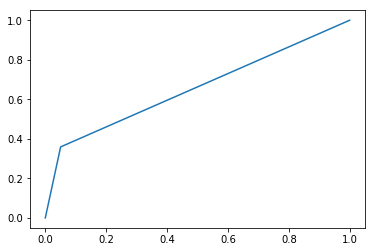

In [103]:
plt.plot(fpr, tpr)

In [106]:
auc = np.trapz(tpr , fpr)

In [1]:
auc

NameError: name 'auc' is not defined

## Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gausian = GaussianNB()

# fitting the model on crossvalidation train
gausian.fit(X_tr, y_tr)

# predict the response on the crossvalidation train
pred = gausian.predict(X_cv)
    
prefor = precision_score(y_cv, pred)
recfor = recall_score(y_cv, pred)
    
# evaluate CV accuracy
f1_score_val = f1_score(y_cv, pred) 

fpr, tpr, thresholds = metrics.roc_curve(y_cv, pred)
auc = metrics.auc(fpr, tpr)

print('\n Precision : %f\n Recall : %f \n F1 Score : %f \n auc : %f ' % (prefor, recfor, f1_score_val, auc))


 Precision : 0.357018
 Recall : 0.544889 
 F1 Score : 0.431386 
 auc : 0.706495 


In [47]:
confusion_matrix(y_cv, pred, labels = [0,1])

array([[7266, 1104],
       [ 512,  613]], dtype=int64)

In [49]:
tn, fp, fn, tp =  confusion_matrix(y_cv, pred).ravel()

In [50]:
print(tn, fp, fn, tp)

7266 1104 512 613


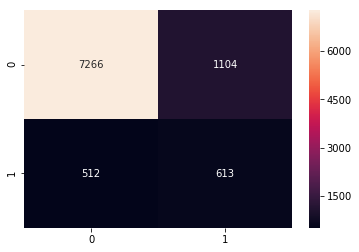

In [55]:
cm_2 = confusion_matrix(y_cv, pred)
sns.heatmap(cm_2,annot=True,fmt="d")

### Correlating Categorical Features

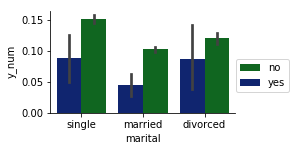

### Correlating Categorical and Numerical Data

In [96]:
rawdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_num'],
      dtype='object')

In [99]:
rawdata.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

## Data Wrangling

#### convert the categorical features to Ordinal. 

In [94]:
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}
job_status_mapping = {'management' : 1, 'technician' : 2, 'entrepreneur':3, 'blue-collar':4, 'admin.':5, 'services':6
                         , 'self-employed':7, 'unemployed':8, 'housemaid':9, 'unknown':10, 'student':11, 'retired':12}
marital_status_mapping = {'tertiary' : 1, 'divorced' : 2, 'married':3}
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}
marital_status_mapping = {'single' : 1, 'divorced' : 2, 'married':3}

rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)
rawdata['marital'] = rawdata['marital'].map(marital_status_mapping)

In [95]:
rawdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,3,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,1,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,3,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,3,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,1,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [9]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### No null values. Good to Go. !!! 
#### 16 Input features to predict whether client subscribe to the term deposit. 

## Univariate Analysis

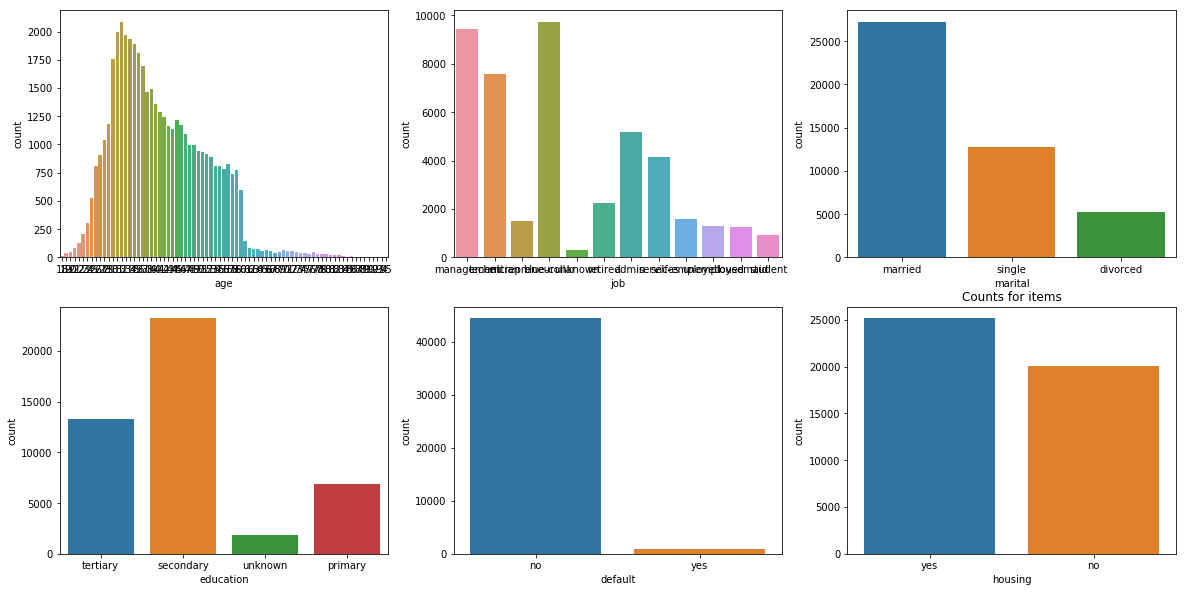

In [17]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

sns.countplot(rawdata['age'], ax = ax11)
sns.countplot(rawdata['job'], ax = ax12)
sns.countplot(rawdata['marital'], ax = ax13)
sns.countplot(rawdata['education'], ax = ax21)
sns.countplot(rawdata['default'], ax = ax22)
sns.countplot(rawdata['housing'], ax = ax23)


plt.title("Counts for items")

plt.show()

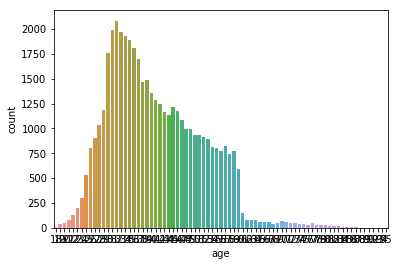

In [38]:
a1 = sns.countplot(rawdata['age'])



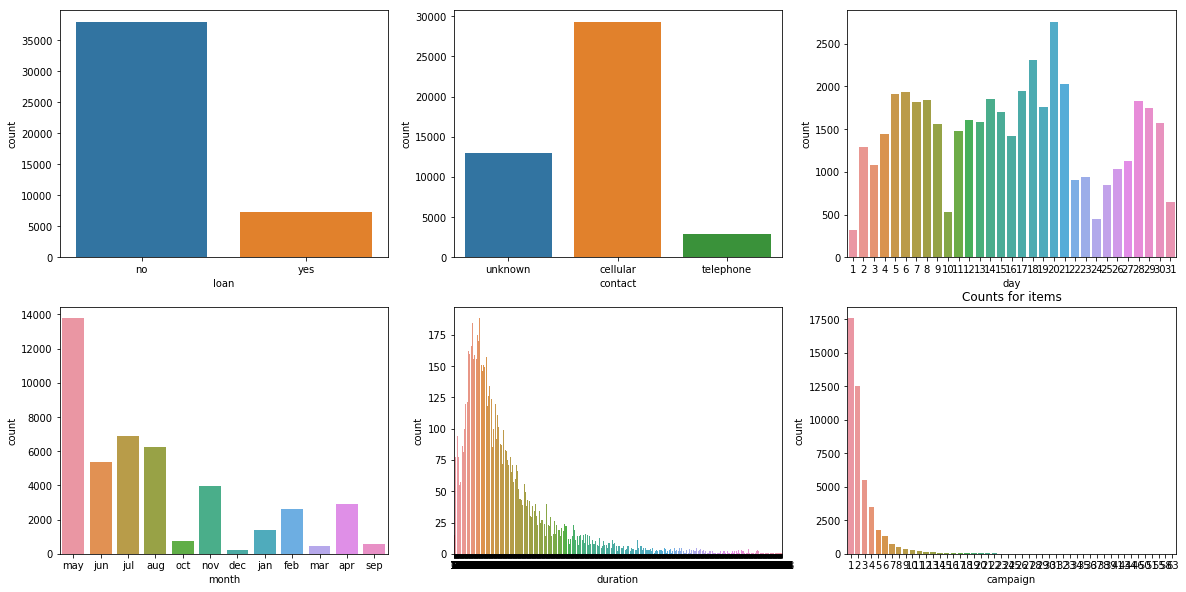

In [14]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

sns.countplot(rawdata['loan'], ax = ax11)
sns.countplot(rawdata['contact'], ax = ax12)
sns.countplot(rawdata['day'], ax = ax13)
sns.countplot(rawdata['month'], ax = ax21)
sns.countplot(rawdata['duration'], ax = ax22)
sns.countplot(rawdata['campaign'], ax = ax23)


plt.title("Counts for items")

plt.show()

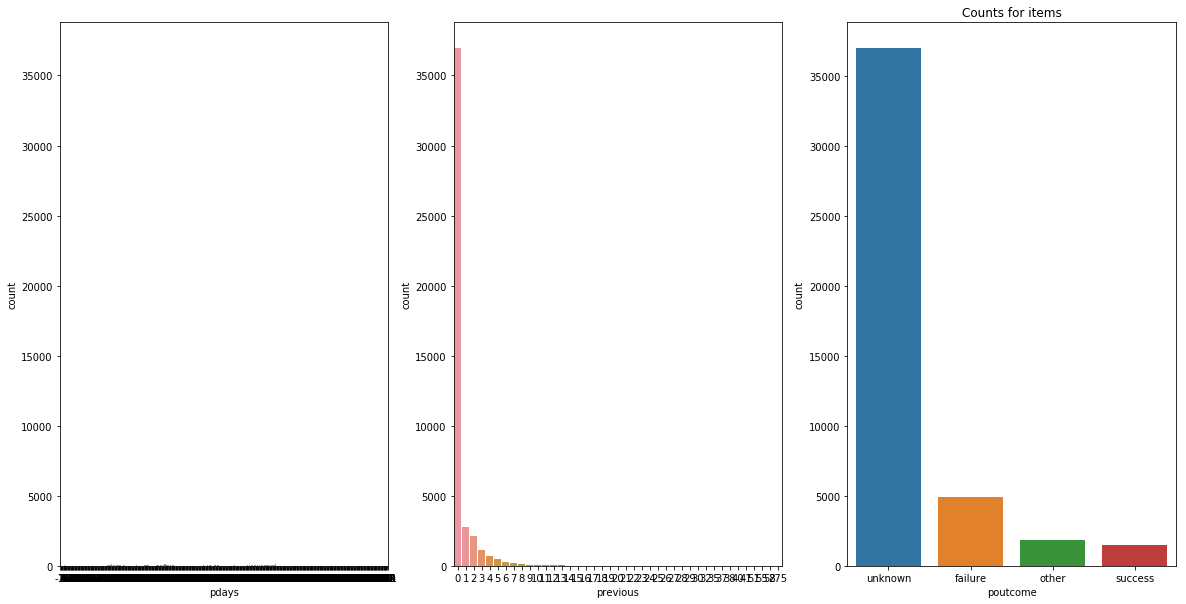

In [15]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(131)
ax12 = fig.add_subplot(132)
ax13 = fig.add_subplot(133)

sns.countplot(rawdata['pdays'], ax = ax11)
sns.countplot(rawdata['previous'], ax = ax12)
sns.countplot(rawdata['poutcome'], ax = ax13)


plt.title("Counts for items")

plt.show()

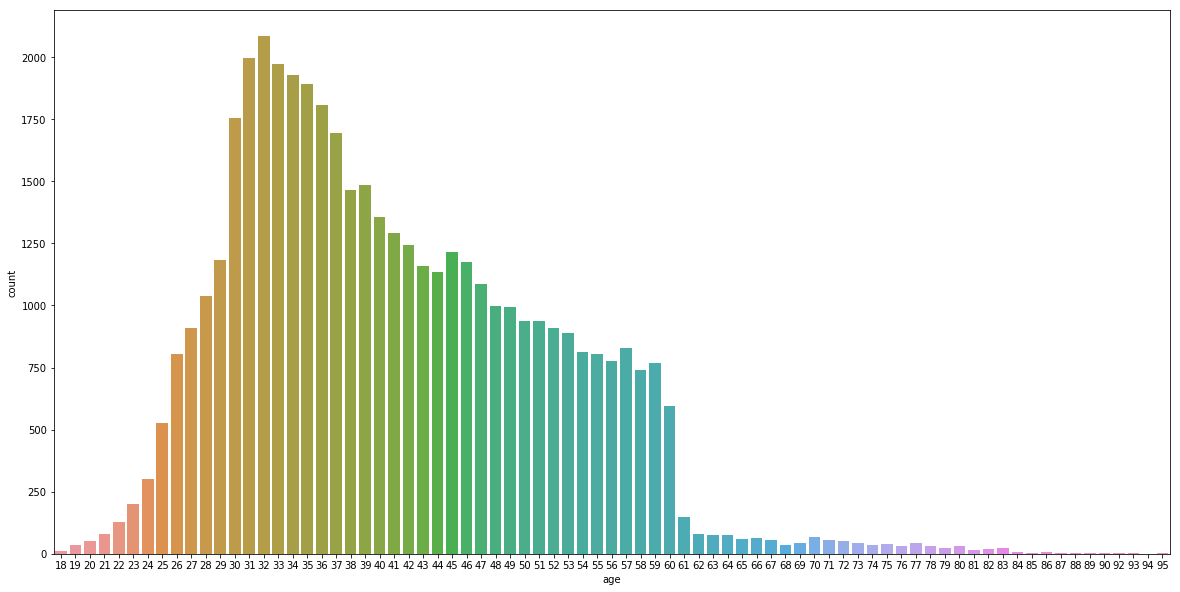

In [19]:
fig = plt.figure(figsize=(20,10))

sns.countplot(rawdata['age'])

plt.show()

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


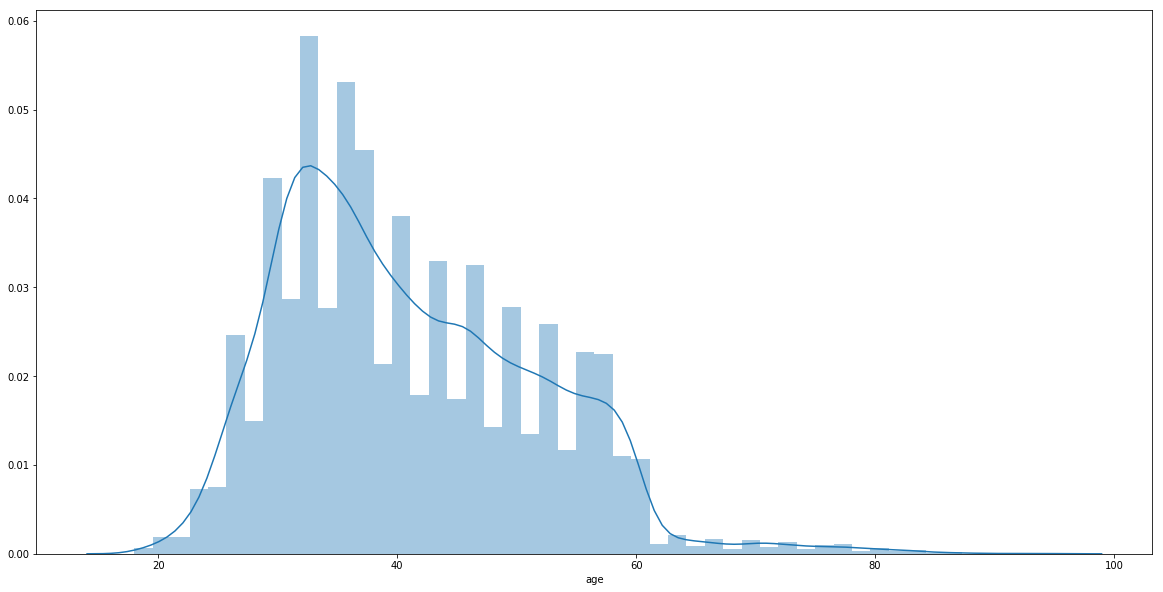

In [24]:
fig = plt.figure(figsize=(20,10))

sns.distplot(rawdata['age'])

plt.show()

## Multivariate Analysis

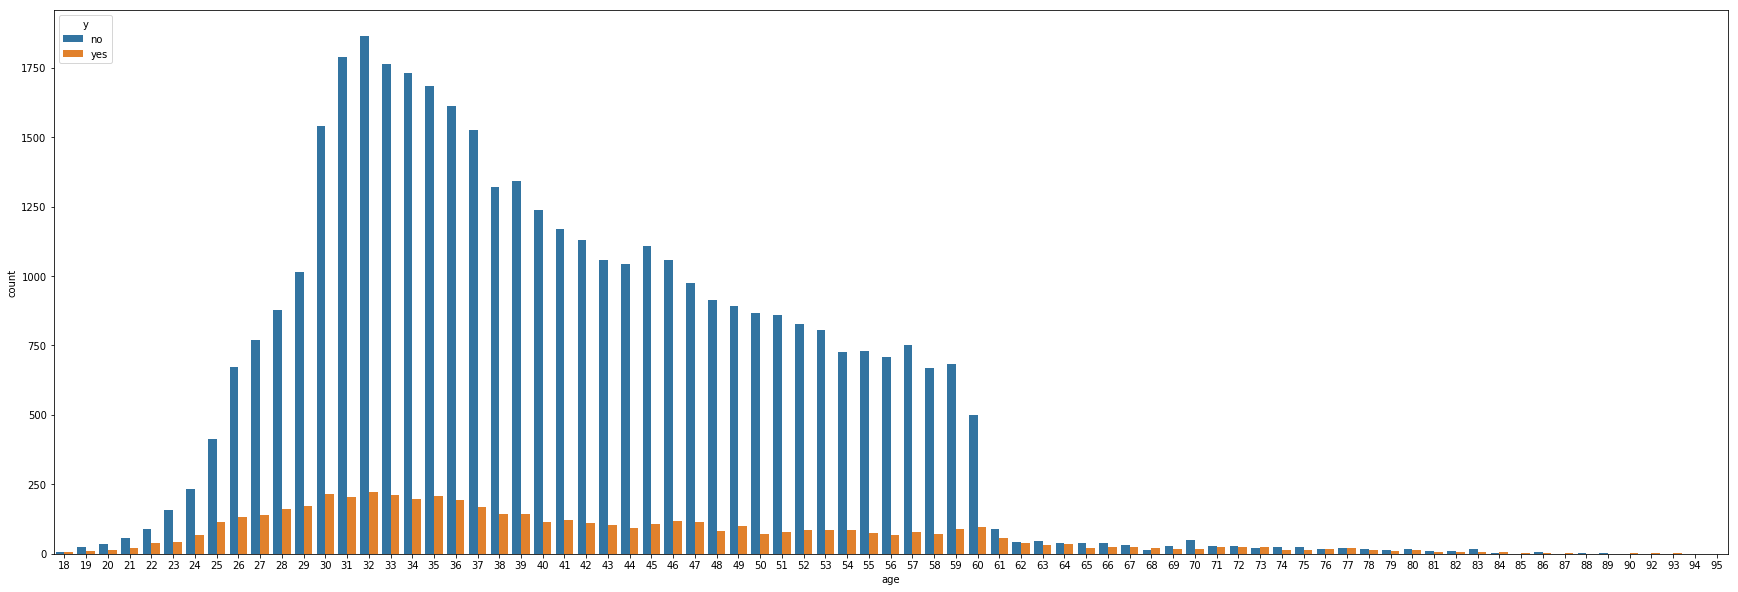

In [53]:
fig = plt.figure(figsize=(30,10))

sns.countplot(x = rawdata['age'], hue = rawdata['y'])

plt.show()

## PDF for Numerical Features
* Age
* Balance
* Day
* Duration
* Campaign
* PDays
* Previous

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


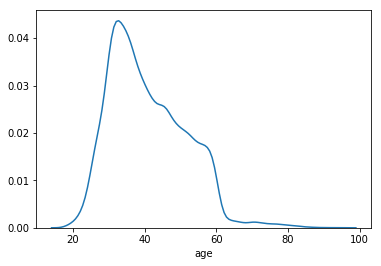

In [9]:
# age

term_deposit = ['i' for i in rawdata['y']]

sns.distplot(rawdata['age'], hist = False)

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


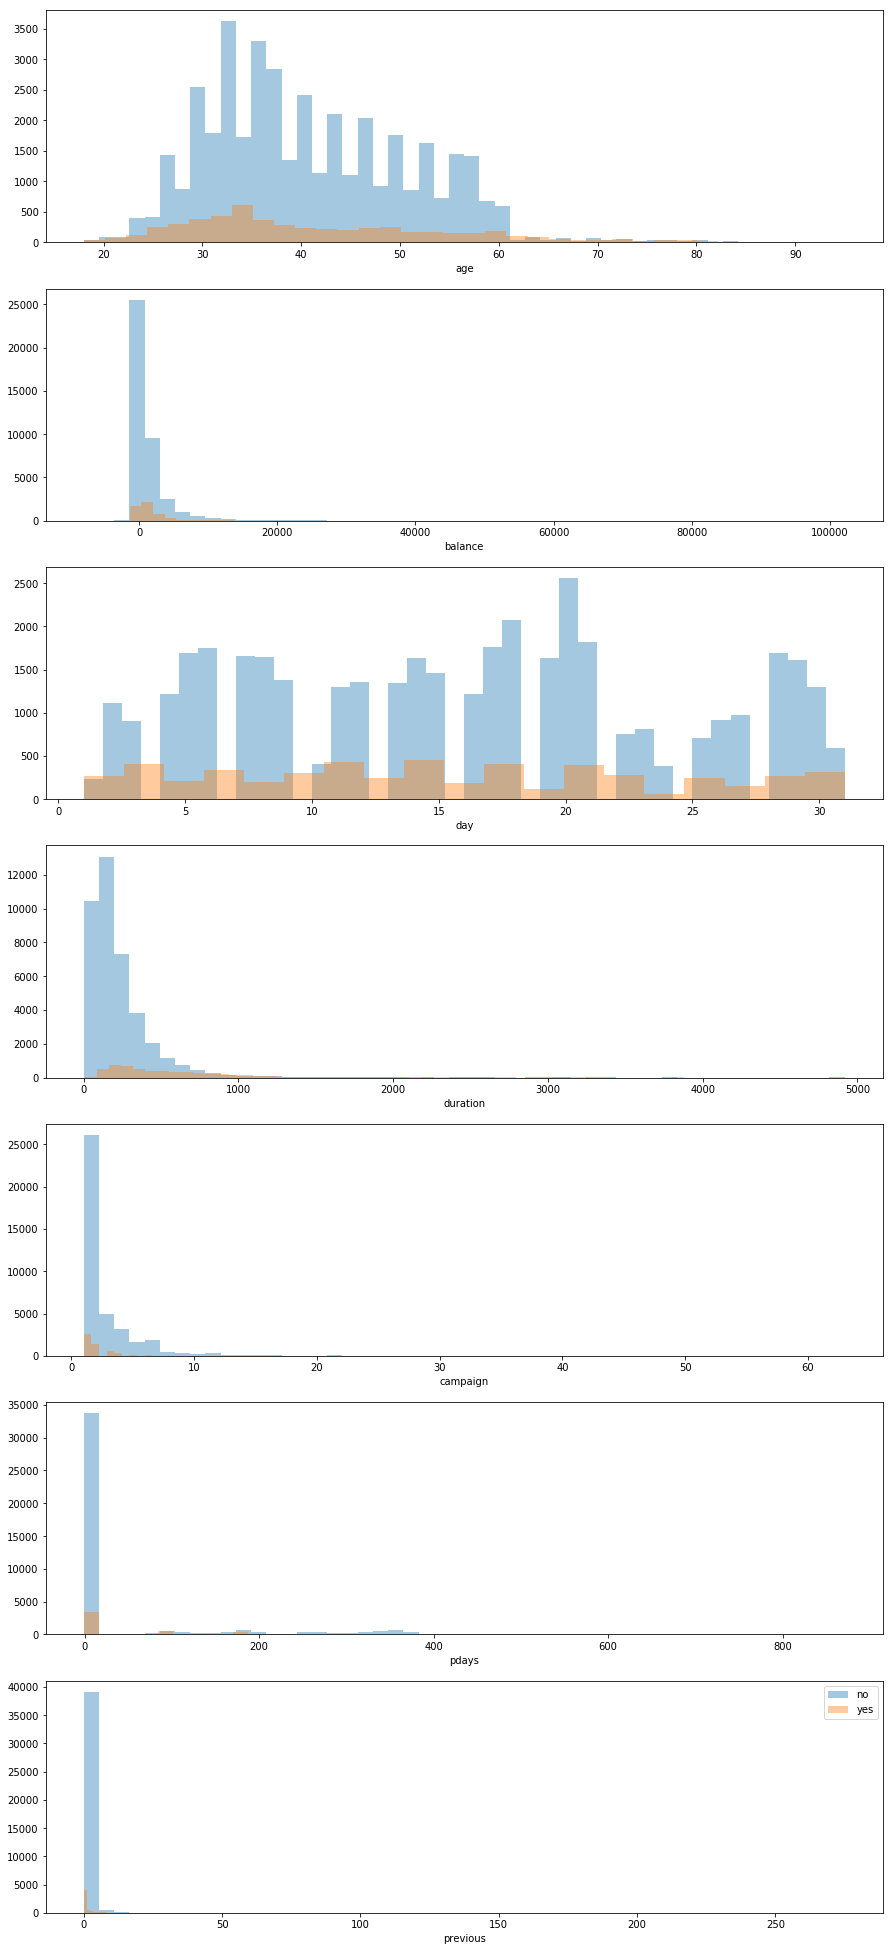

In [60]:
term_deposit = [i for i in rawdata['y'].unique()]

fig = plt.figure(figsize = (15,35))

ax1 = fig.add_subplot(711)
ax2 = fig.add_subplot(712)
ax3 = fig.add_subplot(713)
ax4 = fig.add_subplot(714)
ax5 = fig.add_subplot(715)
ax6 = fig.add_subplot(716)
ax7 = fig.add_subplot(717)

for i in term_deposit:
    term_deposit_i = rawdata[rawdata['y'] == i]
    
    sns.distplot(term_deposit_i['age'], kde = False,  label = i, ax = ax1)
    sns.distplot(term_deposit_i['balance'], kde = False, label = i, ax = ax2)
    sns.distplot(term_deposit_i['day'], kde = False, label = i, ax = ax3)
    sns.distplot(term_deposit_i['duration'], kde = False, label = i, ax = ax4)
    sns.distplot(term_deposit_i['campaign'], kde = False, label = i, ax = ax5)
    sns.distplot(term_deposit_i['pdays'], kde = False, label = i, ax = ax6)
    sns.distplot(term_deposit_i['previous'], kde = False, label = i, ax = ax7)
    
    
plt.legend() 
plt.show()

## Great Insights from above graphs. 
Some graphs needs to be zoomed in coz its very unclear due to outlier distributions. (balance, previous)

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


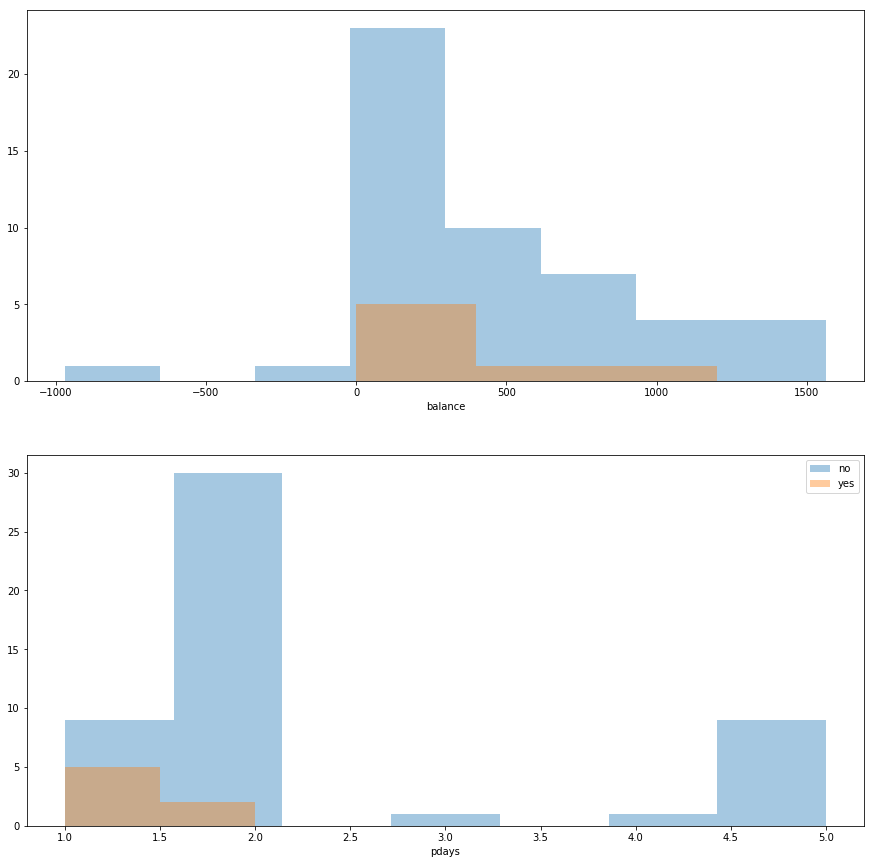

In [61]:
term_deposit = [i for i in rawdata['y'].unique()]

fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in term_deposit:
    term_deposit_i = rawdata[(rawdata['y'] == i) & (rawdata['balance'] <= 2000) & (rawdata['balance'] >= -1000) & (rawdata['pdays'] <= 5) & (rawdata['pdays'] >= 0)]
    
    sns.distplot(term_deposit_i['balance'], kde = False, label = i, ax = ax1)
    sns.distplot(term_deposit_i['pdays'],  kde = False,  label = i, ax = ax2)
    
    
plt.legend() 
plt.show()

In [34]:
rawdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


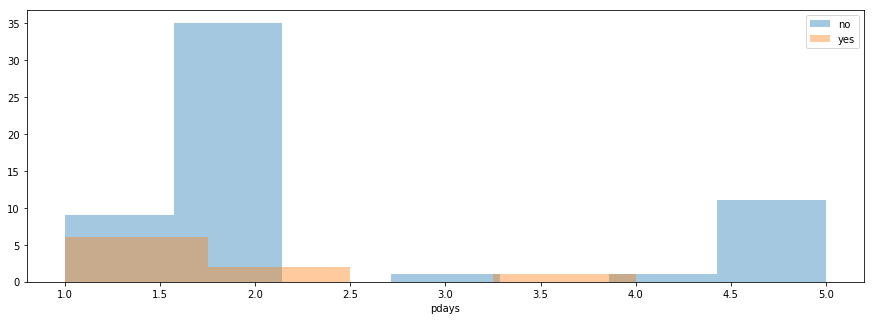

In [64]:
term_deposit = [i for i in rawdata['y'].unique()]

fig = plt.figure(figsize = (15,5))

for i in term_deposit:
    term_deposit_i = rawdata[(rawdata['y'] == i) & (rawdata['pdays'] <= 5) & (rawdata['pdays'] >= 0)]
    
    sns.distplot(term_deposit_i['pdays'], kde = False , label = i)

    
    
plt.legend() 
plt.show()

## Barplot for Categorical Features

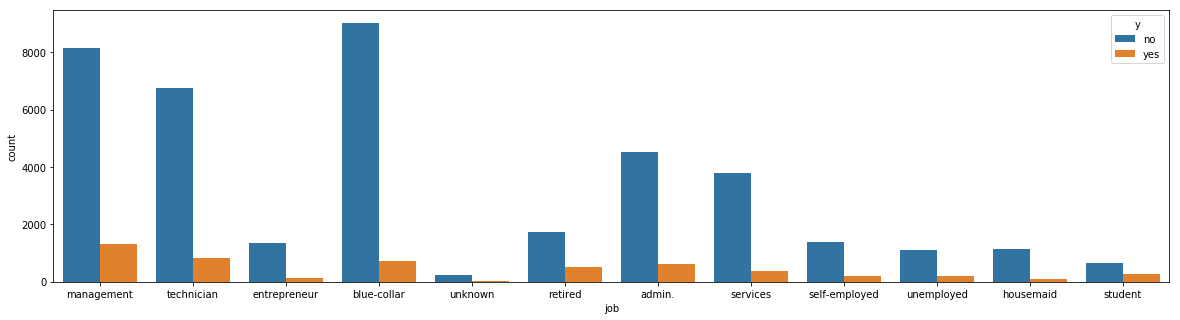

In [57]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = rawdata['job'], hue = rawdata['y'])

###### A yes to No ratio line chart is also a good indicator

In [18]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['job' , 'y']).apply(get_count)
test1 = test1[['job' , 'y','Count_Value']].drop_duplicates()
test1.head(100)



,job,y,Count_Value
0,management,no,8157
1,technician,no,6757
2,entrepreneur,no,1364
3,blue-collar,no,9024
4,unknown,no,254
8,retired,no,1748
10,admin.,no,4540
14,services,no,3785
46,self-employed,no,1392
83,admin.,yes,631


In [19]:
test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']
print(test_n.head(3))
print(test_y.head(3))

            job   y  Count_Value
0    management  no         8157
1    technician  no         6757
2  entrepreneur  no         1364
            job    y  Count_Value
83       admin.  yes          631
87   technician  yes          840
129    services  yes          369


In [21]:
test_y_n = pd.merge(test_n, test_y, on = 'job')
print(test_y_n)

              job y_x  Count_Value_x  y_y  Count_Value_y
0      management  no           8157  yes           1301
1      technician  no           6757  yes            840
2    entrepreneur  no           1364  yes            123
3     blue-collar  no           9024  yes            708
4         unknown  no            254  yes             34
5         retired  no           1748  yes            516
6          admin.  no           4540  yes            631
7        services  no           3785  yes            369
8   self-employed  no           1392  yes            187
9      unemployed  no           1101  yes            202
10      housemaid  no           1131  yes            109
11        student  no            669  yes            269


In [25]:
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

In [26]:
test_y_n

,job,y_x,Count_Value_x,y_y,Count_Value_y,Ratio_Y_N,Percent_Y
0,management,no,8157,yes,1301,15.949491,13.755551
1,technician,no,6757,yes,840,12.431552,11.056996
2,entrepreneur,no,1364,yes,123,9.017595,8.271688
3,blue-collar,no,9024,yes,708,7.845745,7.274969
4,unknown,no,254,yes,34,13.385827,11.805556
5,retired,no,1748,yes,516,29.519451,22.791519
6,admin.,no,4540,yes,631,13.898678,12.202669
7,services,no,3785,yes,369,9.749009,8.883004
8,self-employed,no,1392,yes,187,13.433908,11.842939
9,unemployed,no,1101,yes,202,18.346957,15.502686


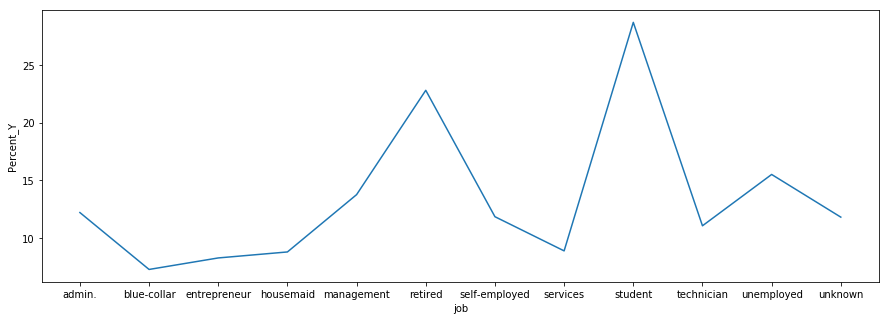

In [30]:
fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'job', y='Percent_Y', data = test_y_n)

plt.show()

In [31]:
## similarly plot ratios

    marital y_x  Count_Value_x  y_y  Count_Value_y
0   married  no          24459  yes           2755
1    single  no          10878  yes           1912
2  divorced  no           4585  yes            622


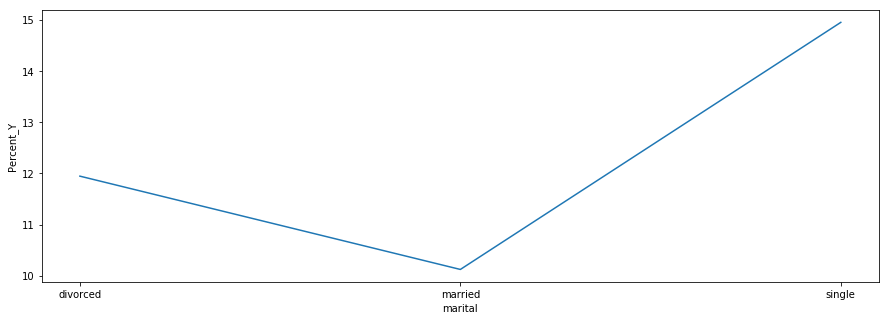

In [33]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['marital' , 'y']).apply(get_count)
test1 = test1[['marital' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'marital')
print(test_y_n)
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'marital', y='Percent_Y', data = test_y_n)

plt.show()

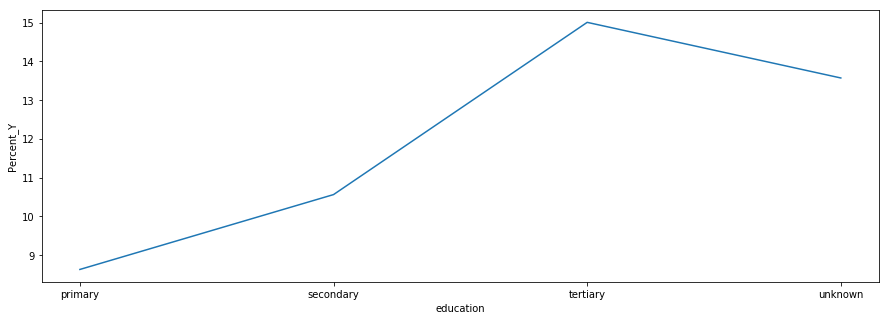

In [121]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['education' , 'y']).apply(get_count)
test1 = test1[['education' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'education')

test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'education', y='Percent_Y', data = test_y_n)

plt.show()

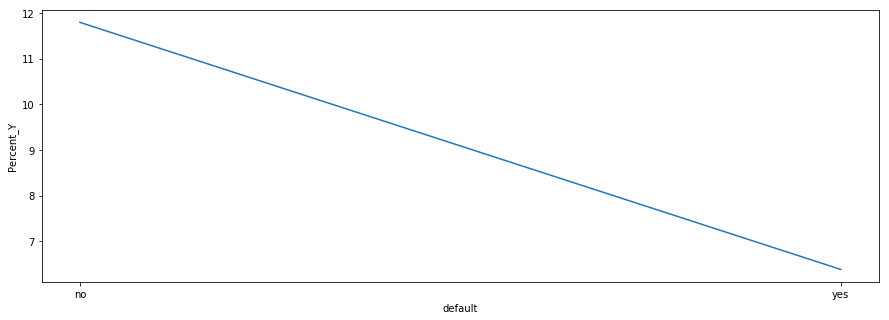

In [122]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['default' , 'y']).apply(get_count)
test1 = test1[['default' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'default')
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'default', y='Percent_Y', data = test_y_n)

plt.show()

  housing y_x  Count_Value_x  y_y  Count_Value_y
0     yes  no          23195  yes           1935
1      no  no          16727  yes           3354


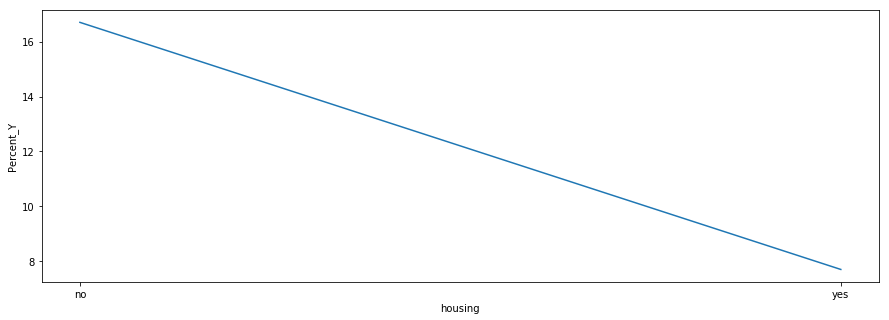

In [54]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['housing' , 'y']).apply(get_count)
test1 = test1[['housing' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'housing')
print(test_y_n)
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = test_y_n.housing, y=test_y_n.Percent_Y)

plt.show()

  loan y_x  Count_Value_x  y_y  Count_Value_y
0   no  no          33162  yes           4805
1  yes  no           6760  yes            484


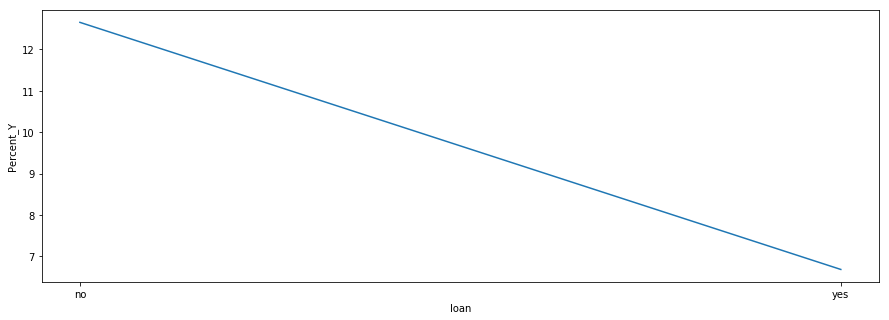

In [70]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['loan' , 'y']).apply(get_count)
test1 = test1[['loan' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'loan')
print(test_y_n)
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'loan', y='Percent_Y', data = test_y_n)

plt.show()

     contact y_x  Count_Value_x  y_y  Count_Value_y
0    unknown  no          12490  yes            530
1   cellular  no          24916  yes           4369
2  telephone  no           2516  yes            390


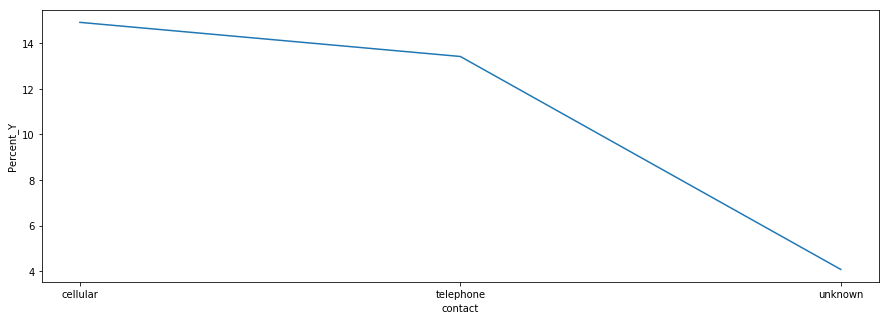

In [71]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['contact' , 'y']).apply(get_count)
test1 = test1[['contact' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'contact')
print(test_y_n)
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'contact', y='Percent_Y', data = test_y_n)

plt.show()

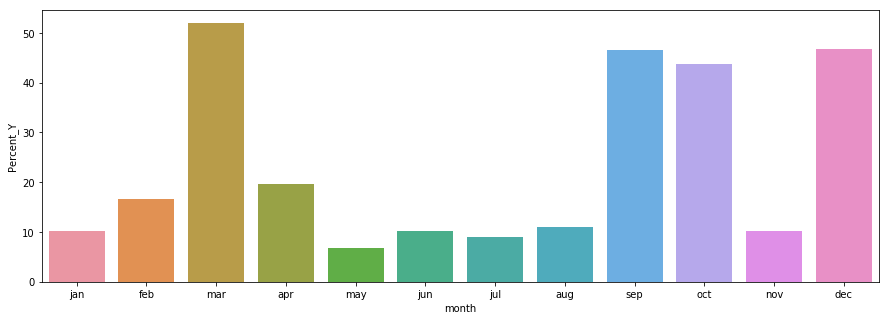

In [111]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

order_list = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

test1 = rawdata.groupby(['month' , 'y']).apply(get_count)

test1 = test1[['month' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'month')

test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.barplot(x = 'month', y='Percent_Y', data = test_y_n, order = order_list)

plt.show()

  poutcome y_x  Count_Value_x  y_y  Count_Value_y
0  unknown  no          33573  yes           3386
1  failure  no           4283  yes            618
2    other  no           1533  yes            307
3  success  no            533  yes            978


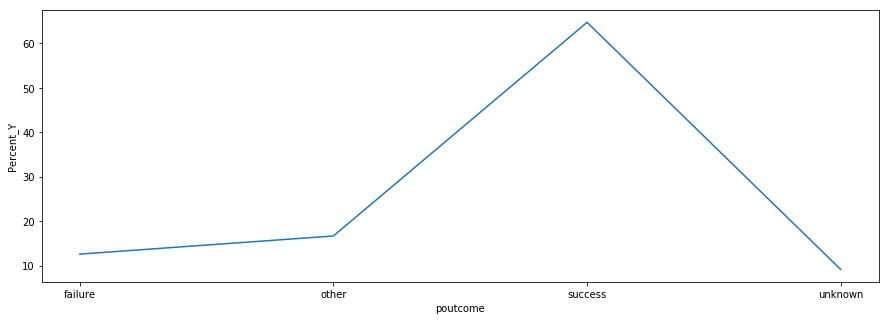

In [80]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['poutcome' , 'y']).apply(get_count)
test1 = test1[['poutcome' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'poutcome')
print(test_y_n)
test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'poutcome', y='Percent_Y', data = test_y_n)

plt.show()

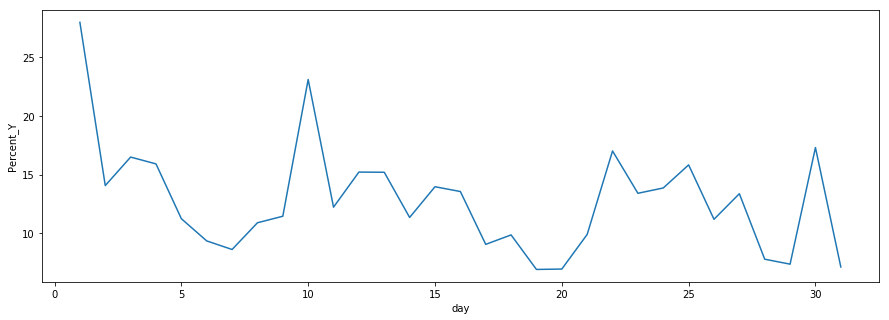

In [82]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['day' , 'y']).apply(get_count)
test1 = test1[['day' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'day')

test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'day', y='Percent_Y', data = test_y_n)

plt.show()

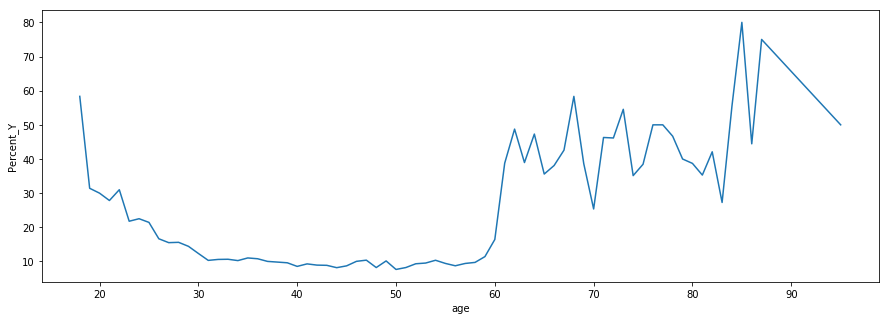

In [83]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['age' , 'y']).apply(get_count)
test1 = test1[['age' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'age')

test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'age', y='Percent_Y', data = test_y_n)

plt.show()

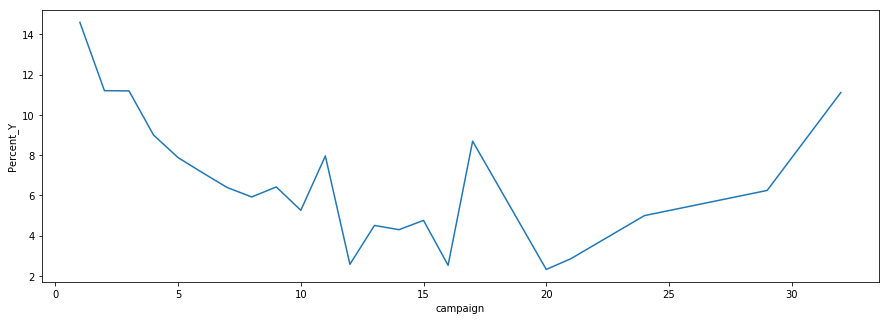

In [86]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['campaign' , 'y']).apply(get_count)
test1 = test1[['campaign' , 'y','Count_Value']].drop_duplicates()

test_n = test1[test1['y'] == 'no']
test_y = test1[test1['y'] == 'yes']

test_y_n = pd.merge(test_n, test_y, on = 'campaign')

test_y_n['Percent_Y'] = test_y_n['Count_Value_y'] * 100 / (test_y_n['Count_Value_x'] + test_y_n['Count_Value_y'])

fig = plt.figure( figsize = (15,5))

sns.lineplot(x = 'campaign', y='Percent_Y', data = test_y_n)

plt.show()

In [53]:
rawdata['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
rawdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
print(np.percentile(rawdata['age'], [0,50,90,95,99]))
print(np.percentile(rawdata['balance'], [0,50,90,95,99]))

[18. 39. 56. 59. 71.]
[-8019.    448.   3574.   5768.  13164.9]
